In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy import stats
%matplotlib inline
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import fix_yahoo_finance as yf
import re

In [2]:
df = pd.read_csv("Data.csv")

In [4]:
def dataproc(df):
    close = list()
    for column in df.columns:
        p = r'[a-zA-Z-]+_Close$'
        match = re.findall(p, column)
        close += match
    df = df[close]
    close = df
    return close

In [30]:
close = dataproc(df)

In [11]:
close_1 = close.iloc[:,0:100]
close_2 = close.iloc[:,101:200]
close_3 = close.iloc[:,201:]

In [9]:
def get_port(close, number_of_assets):
    # Initial analysis, calculate the rate of return 
    log_returns = np.log(close/close.shift(1)) 
    # To optimize the portfoio
    rets = log_returns
    year_ret = rets.mean() * 252 # calculate yearly rate of return 
    year_volatility = rets.cov() * 252 # calculate the covariance matrix
    
    portfolio_returns = []
    portfolio_volatilities = [] # create new list to store the returns and volatities calculated later
    for p in range(1000):
        weights = np.random.random(number_of_assets)
        weights /=np.sum(weights)
        portfolio_returns.append(np.sum(rets.mean() * weights) * 252)
        portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() *252, weights))))
        
    portfolio_returns = np.array(portfolio_returns)
    portfolio_volatilities = np.array(portfolio_volatilities)
    
    # draw a scatter picture to find the point with highest sharp ratio
    plt.figure(figsize=(9,6))
    plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_returns/portfolio_volatilities, marker='o')
    plt.grid(True)
    plt.xlabel('expected volatility')
    plt.ylabel('expected return')
    plt.colorbar(label='Sharpe ratio')
    
    def calculations(weights):
        weights = np.array(weights)
        pret = np.sum(rets.mean()*weights)*252
        pvol = np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252, weights)))
        return np.array([pret, pvol, pret/pvol])
    
    def min_func_sharpe(weights):
        return -calculations(weights)[2]
    
    bnds = tuple((0,1) for x in range(number_of_assets))# boundary condition:every weight needs to be in(0,1)
    cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # constraints
    
    # use package to apply minimization optimization algorithm 
    opts = sco.minimize(min_func_sharpe, 
                        (number_of_assets * [1. / number_of_assets,]), 
                        method='SLSQP', bounds=bnds, constraints=cons)
    
    return opts['x'].round(3) # weight distribution under the largest sharp ratio

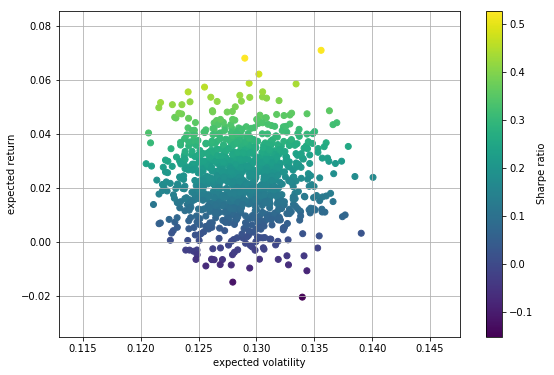

In [12]:
port_1 = get_port(close_1, 100)

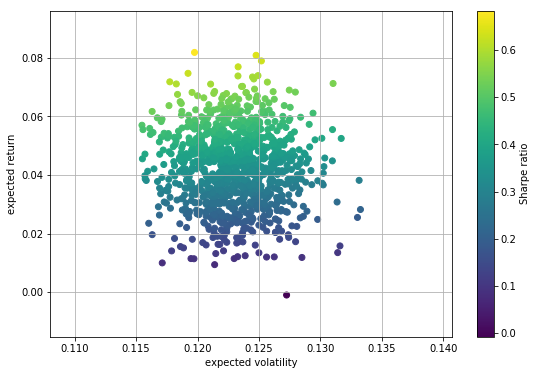

In [15]:
port_2 = get_port(close_2, 99)

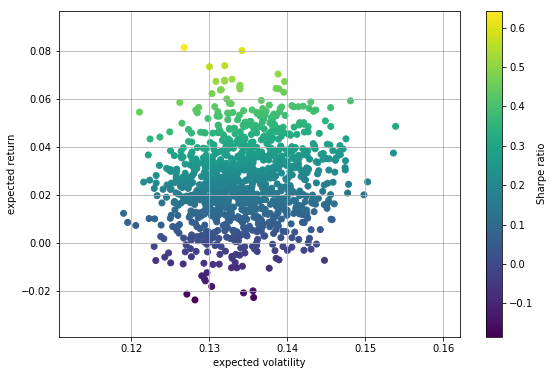

In [17]:
port_3 = get_port(close_3, 50)

In [21]:
close

,AA_Close,AABA_Close,AAL_Close,AAPL_Close,ABBV_Close,ABEV_Close,ABT_Close,ABX_Close,ACB_Close,ACN_Close,...,WDC_Close,WFC_Close,WMB_Close,WMT_Close,WPX_Close,WU_Close,WY_Close,X_Close,XOM_Close,ZNGA_Close
0,30.690001,41.110001,46.080002,111.730003,60.419998,5.18,39.759998,15.390000,2.091,119.680000,...,61.169998,52.119999,30.520000,69.370003,13.310000,21.049999,31.639999,28.780001,86.489998,2.80
1,31.340000,41.009998,46.080002,111.800003,58.930000,5.06,38.099998,15.350000,1.820,119.480003,...,61.189999,52.220001,30.650000,70.120003,13.200000,21.270000,32.130001,32.209999,86.680000,2.79
2,31.510000,40.959999,46.340000,111.230003,60.180000,5.17,38.980000,14.630000,2.107,119.820000,...,61.040001,52.160000,30.620001,70.830002,13.430000,21.469999,31.809999,33.060001,86.919998,2.85
3,31.700001,40.869999,46.820000,111.790001,60.509998,4.96,39.160000,14.760000,2.030,120.739998,...,61.590000,52.619999,30.090000,71.230003,13.280000,21.480000,32.000000,33.230000,87.120003,2.88
4,30.860001,41.450001,46.500000,111.570000,59.459999,5.11,38.740002,15.400000,2.040,120.760002,...,62.270000,51.580002,29.240000,71.190002,12.750000,21.200001,31.219999,32.169998,86.470001,2.85
5,29.730000,41.599998,46.889999,111.459999,61.590000,4.99,38.730000,15.440000,1.976,120.940002,...,62.669998,51.860001,28.930000,71.370003,12.180000,21.160000,31.160000,31.160000,85.900002,2.87
6,28.969999,41.020000,46.439999,110.519997,60.799999,4.99,38.070000,15.020000,2.005,119.430000,...,63.660000,52.919998,30.700001,70.430000,15.540000,21.030001,30.830000,32.340000,87.300003,2.86
7,28.879999,39.630001,45.750000,109.489998,59.160000,4.76,37.599998,15.020000,1.944,117.660004,...,61.610001,54.340000,30.020000,70.669998,15.000000,20.740000,30.610001,32.029999,87.239998,2.87
8,29.040001,40.070000,46.099998,109.900002,59.430000,4.78,37.900002,15.660000,1.820,117.290001,...,63.349998,53.580002,30.830000,70.879997,15.210000,20.469999,31.049999,33.610001,87.040001,2.86
9,31.219999,40.200001,45.720001,109.110001,60.860001,4.82,38.430000,15.710000,1.650,117.720001,...,62.090000,54.349998,31.410000,69.940002,14.720000,20.889999,31.719999,35.209999,87.480003,2.95


In [32]:
def set_new_assets(port, port_close,close,name):
    asset = np.array(port_close)
    new_assets = port * asset
    close[name] = pd.DataFrame(new_assets).apply(sum, axis = 1)

In [33]:
set_new_assets(port_1, close_1, close, 'port_1')
set_new_assets(port_2, close_2, close, 'port_2')
set_new_assets(port_3, close_3, close, 'port_3')

/Users/wen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [36]:
close_123 = close[['port_1', 'port_2', 'port_3']]

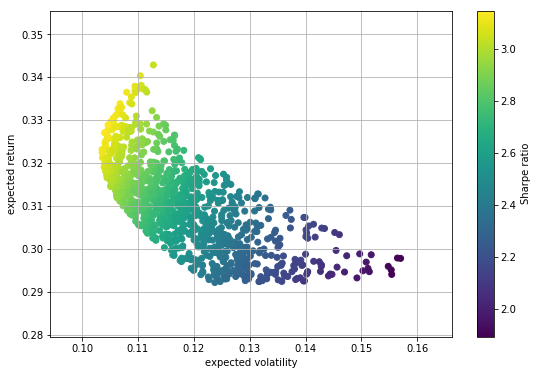

In [38]:
port_123 = get_port(close_123, 3)

In [40]:
port_123

array([0.3, 0.7, 0. ])

In [47]:
def get_returns(port, close):
    log_returns = np.log(close/close.shift(1)) 
    rets = log_returns
    
    
    # use a function, when you input weights, the rate of return, votalities and sharpe ratio will be the output
    def calculations(weights):
        weights = np.array(weights)
        pret = np.sum(rets.mean()*weights)*252
        pvol = np.sqrt(np.dot(weights.T,np.dot(rets.cov()*252, weights)))
        return np.array([pret, pvol, pret/pvol])
    
    return calculations(port)

In [48]:
get_returns(port_123,close_123)

array([0.32980886, 0.10466288, 3.1511539 ])